In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.io import loadmat
from IPython.display import Image, display

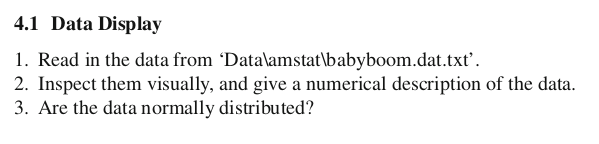

In [2]:
Image('../Part.1/imgs/exercise.4.1.png')

In [3]:
metadata = '../Data/amstat/babyboom.txt'
dataset = '../Data/amstat/babyboom.dat.txt'


with open(metadata) as fp:
    for line in fp.readlines():
        print(line)
        
        
print('\n\nSAMPLE DATA:\n')
with open(dataset) as fp:
    for i, line in enumerate(fp.readlines()):
        print(line)
        if i > (5-1):
            break

NAME: Time of Birth, Sex, and Birth Weight of 44 Babies

TYPE: Observational

SIZE: 44 observations, 4 variables



DESCRIPTIVE ABSTRACT:

The dataset contains the time of birth, sex, and birth weight for each

of 44 babies born in one 24-hour period at a Brisbane, Australia,

hospital.  Also included is the number of minutes since midnight for

each birth.



SOURCE: 

The data appeared in the Brisbane newspaper _The Sunday Mail_ on

December 21, 1997.



VARIABLE DESCRIPTIONS: 

Columns

 1 -  8  Time of birth recorded on the 24-hour clock

 9 - 16  Sex of the child (1 = girl, 2 = boy)

17 - 24  Birth weight in grams

25 - 32  Number of minutes after midnight of each birth



Values are aligned and delimited by blanks.  There are no missing

values.



STORY BEHIND THE DATA:

Forty-four babies -- a new record -- were born in one 24-hour period at

the Mater Mothers' Hospital in Brisbane, Queensland, Australia, on

December 18, 1997.  For each of the 44 babies, _The Sunday Mail_

reco

In [4]:
babyboom = pd.read_csv('../Data/amstat/babyboom.dat.txt', sep='\s+', header=None,
                       names=['time_of_birth', 'sex', 'weight', 'mm_after_midnight'], dtype=np.str_)
display(babyboom.head())
display(babyboom.tail())

,time_of_birth,sex,weight,mm_after_midnight
0,0005,1,3837,5
1,0104,1,3334,64
2,0118,2,3554,78
3,0155,2,3838,115
4,0257,2,3625,177


,time_of_birth,sex,weight,mm_after_midnight
39,2104,2,2121,1264
40,2123,2,3150,1283
41,2217,1,3866,1337
42,2327,1,3542,1407
43,2355,1,3278,1435


In [5]:
# Converting to the appropriate dtypes
def datetime_of_birth(hh_birth):
    return 'December 21, 1997 ' + hh_birth[:2] + ':' + hh_birth[2:]

babyboom.time_of_birth = pd.to_datetime(babyboom.time_of_birth.map(datetime_of_birth))

babyboom.sex = babyboom.sex.map({'1':'Girl', '2': 'Boy'}).astype('category')

babyboom.weight = babyboom.weight.astype(np.float_)

babyboom.mm_after_midnight = (pd.to_timedelta(babyboom.mm_after_midnight.astype(np.int_), unit='m')
                                 .astype('timedelta64[m]'))

#Checking for changes
display(babyboom.head())
display(babyboom.tail())

,time_of_birth,sex,weight,mm_after_midnight
0,1997-12-21 00:05:00,Girl,3837.0,5.0
1,1997-12-21 01:04:00,Girl,3334.0,64.0
2,1997-12-21 01:18:00,Boy,3554.0,78.0
3,1997-12-21 01:55:00,Boy,3838.0,115.0
4,1997-12-21 02:57:00,Boy,3625.0,177.0


,time_of_birth,sex,weight,mm_after_midnight
39,1997-12-21 21:04:00,Boy,2121.0,1264.0
40,1997-12-21 21:23:00,Boy,3150.0,1283.0
41,1997-12-21 22:17:00,Girl,3866.0,1337.0
42,1997-12-21 23:27:00,Girl,3542.0,1407.0
43,1997-12-21 23:55:00,Girl,3278.0,1435.0


In [6]:
display(babyboom.describe())

,weight,mm_after_midnight
count,44.000000,44.000000
mean,3275.954545,788.727273
std,528.032458,416.066931
min,1745.000000,5.000000
25%,3141.500000,482.750000
50%,3404.000000,846.500000
75%,3571.750000,1158.500000
max,4162.000000,1435.000000


In [7]:
# Preparations for plotting

# Append to path and import freq. used rc_params module
import sys
sys.path.append('../../../data.visualization')
from rc_params import rc

sns.set(style='whitegrid', rc=rc)
%matplotlib inline

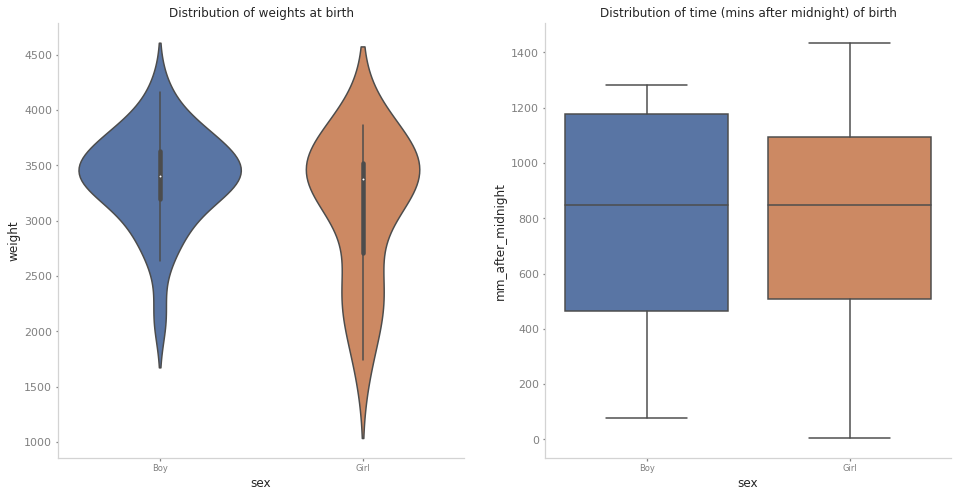

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

sns.violinplot(y='weight', x='sex', data=babyboom, ax=ax[0])
sns.boxplot(y='mm_after_midnight', x='sex', data=babyboom, ax=ax[1])

ax[0].set_title("Distribution of weights at birth")
ax[1].set_title("Distribution of time (mins after midnight) of birth")

plt.show()

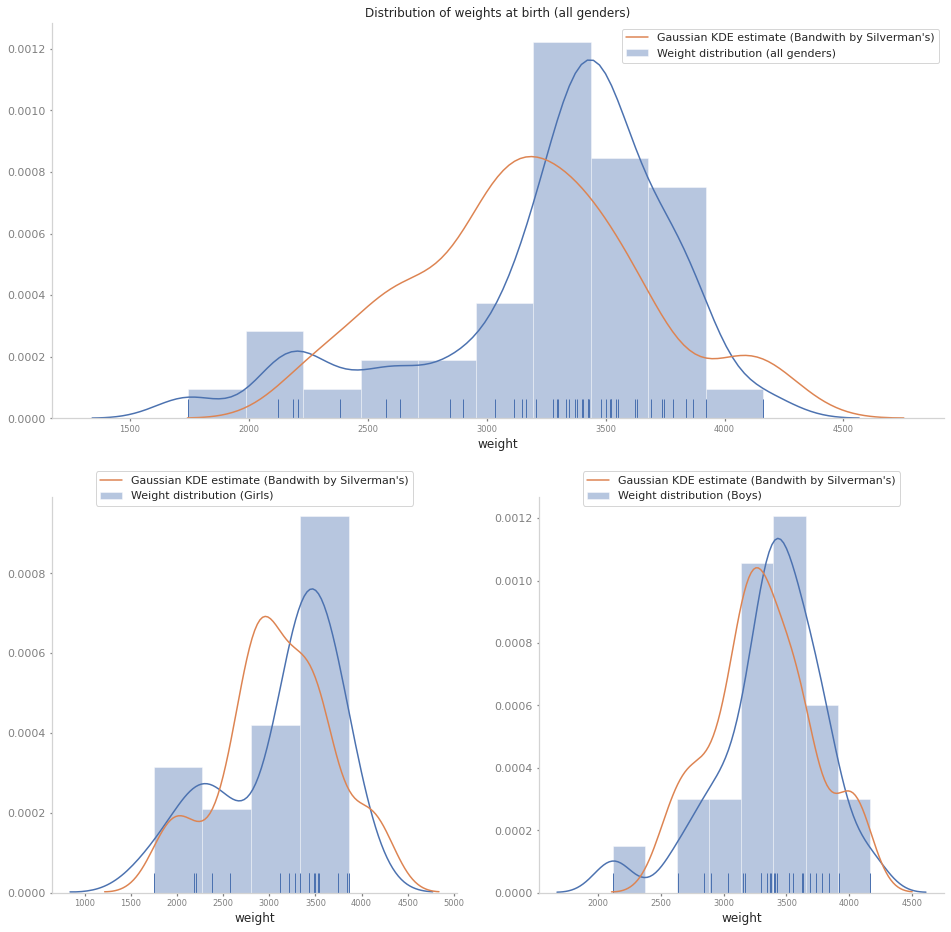

In [9]:
fig = plt.figure(figsize=(16, 16))
gs = fig.add_gridspec(2,2)

# Plot variables:
girls = babyboom.sex == 'Girl'

filters = (girls | ~girls, girls, ~girls)
axes = (gs[0, :], gs[1, 0], gs[1, 1])
labels = ('all genders', 'Girls', 'Boys')
legend_kws = ((), 
              dict(loc='upper center', bbox_to_anchor=(0.5, 1.08)), 
              dict(loc='upper center', bbox_to_anchor=(0.5, 1.08)))

for _filter, ax, label, legend_kws in zip(filters, axes, labels, legend_kws):
    data = babyboom[_filter].weight
    gaussian_sample = stats.norm.rvs(loc=data.mean(), scale=data.std(), 
                                     size=data.size, random_state=42)
    
    ax = fig.add_subplot(ax)
    sns.distplot(data, rug=True, kde_kws=dict(bw='silverman'), ax=ax, 
                 label=f'Weight distribution ({label})')
    
    sns.kdeplot(gaussian_sample, bw='silverman', ax=ax, 
                label="Gaussian KDE estimate (Bandwith by Silverman's)")
    ax.legend(**legend_kws) if legend_kws else ax.legend()
    
fig.axes[0].set_title('Distribution of weights at birth (all genders)')
plt.show()

As Steele et all noted, weight distributions at birth are unsuitable to be modeled by the normal distribution, but the weights are closer to the normal distribution if the data is factored by sex.